**SENTIMENT ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    News_df=pd.read_csv(r"C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\raw_analyst_ratings\raw_analyst_ratings.csv")
    print("File loaded successfully")
    print(News_df.head())
except FileNotFoundError:
    print(f"Error: The file was not found.")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")

File loaded successfully
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2

In [3]:
def Sentiment_Computation(text):
    return TextBlob(text).sentiment.polarity

#Adding Sentiment column that assess and gives sentiment polarity( +ve,-ve or Neutral)

News_df['Sentiment']=News_df["headline"].apply(Sentiment_Computation)
print(News_df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  Sentiment  
0  2020-06-05 10:30:54-04:00     A        0.0  
1  2020-06-03 10:45:20-04:00     A        0.

In [4]:
News_df['Sentiment']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
           ... 
1407323    0.15
1407324    0.15
1407325    0.00
1407326    0.00
1407327    0.00
Name: Sentiment, Length: 1407328, dtype: float64

**Descriptive Statistics**

In [5]:
print('Getting a general overview of Healdlines')
print(News_df['headline'].describe())
print('Getting a general overview of publisher')
print(News_df['publisher'].describe())
print('Getting a general overview of Sentiment')
print(News_df['Sentiment'].describe())
print('Getting a general overview of Stock')
print(News_df['stock'].describe())

Getting a general overview of Healdlines
count                     1407328
unique                     845770
top       Benzinga's Top Upgrades
freq                         5449
Name: headline, dtype: object
Getting a general overview of publisher
count           1407328
unique             1034
top       Paul Quintaro
freq             228373
Name: publisher, dtype: object
Getting a general overview of Sentiment
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Sentiment, dtype: float64
Getting a general overview of Stock
count     1407328
unique       6204
top           MRK
freq         3333
Name: stock, dtype: object


In [6]:
print('Checking for missing values in headline')
print(News_df['headline'].isna().sum())
print('Checking for missing values in publisher')
print(News_df['publisher'].isna().sum())
print('Checking for missing values in stock')
print(News_df['stock'].isna().sum())

Checking for missing values in headline
0
Checking for missing values in publisher
0
Checking for missing values in stock
0


In [7]:
# Display the most frequent headlines
print("\nMost frequent headlines:")
print(News_df['headline'].value_counts().head())
# Display the most frequent stock
print("\nMost frequent stock:")
print(News_df['stock'].value_counts().head())
# Display the most frequent publisher
print("\nMost frequent publisher:")
print(News_df['publisher'].value_counts().head())


Most frequent headlines:
headline
Benzinga's Top Upgrades                     5449
Benzinga's Top Downgrades                   5372
Benzinga's Top Initiations                  4241
Stocks That Hit 52-Week Lows On Thursday    3962
Morning Market Losers                       3440
Name: count, dtype: int64

Most frequent stock:
stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
Name: count, dtype: int64

Most frequent publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


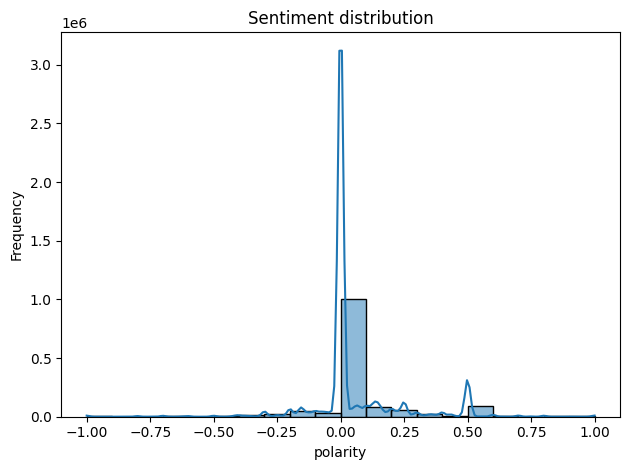

In [8]:
#Plot of Sentiment distribution
plt.Figure(figsize=(15,15))
sns.histplot(News_df['Sentiment'],bins=20,kde=True)
plt.title('Sentiment distribution')
plt.xlabel("polarity")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**TimeSeries Analysis**

In [9]:
News_df.dtypes

Unnamed: 0      int64
headline       object
url            object
publisher      object
date           object
stock          object
Sentiment     float64
dtype: object

In [10]:
News_df['date']=pd.to_datetime(News_df['date'],format="mixed",utc=True)

In [11]:
print(News_df['date'].dtypes)

datetime64[ns, UTC]


In [12]:
#Displays days for the most publication
Day_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Month_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Date_count=News_df['date'].dt.date.value_counts()
weekly_counts= News_df['date'].dt.day_name().value_counts().reindex(Day_order)
monthly_counts= News_df['date'].dt.month_name().value_counts().reindex(Month_order)
yearly_counts=News_df['date'].dt.year.value_counts()
week_number=News_df['date'].dt.isocalendar().week.astype(int).value_counts().sort_index() # isocalendar().week:: returns weeknumber 1-52 for a year
print(weekly_counts)
print(monthly_counts)
print(yearly_counts)
print(Date_count)
print(week_number)

date
Monday       265139
Tuesday      296505
Wednesday    300922
Thursday     302619
Friday       217918
Saturday       7759
Sunday        16466
Name: count, dtype: int64
date
January      121545
February     122836
March        121949
April        121813
May          130340
June         106598
July         110764
August       124041
September     96089
October      124800
November     121430
December     105123
Name: count, dtype: int64
date
2019    150380
2018    146924
2016    141892
2015    135295
2014    134859
2011    131322
2017    124456
2012    122649
2013    121529
2020    105214
2010     81319
2009     11489
Name: count, dtype: int64
date
2020-03-12    2739
2020-02-28    1620
2020-03-19    1595
2020-02-27    1567
2020-03-06    1428
              ... 
2009-07-17       1
2018-04-07       1
2019-01-05       1
2009-02-14       1
2016-01-01       1
Name: count, Length: 3955, dtype: int64
week
1     20176
2     28887
3     26187
4     29184
5     31622
6     31251
7     30065
8   

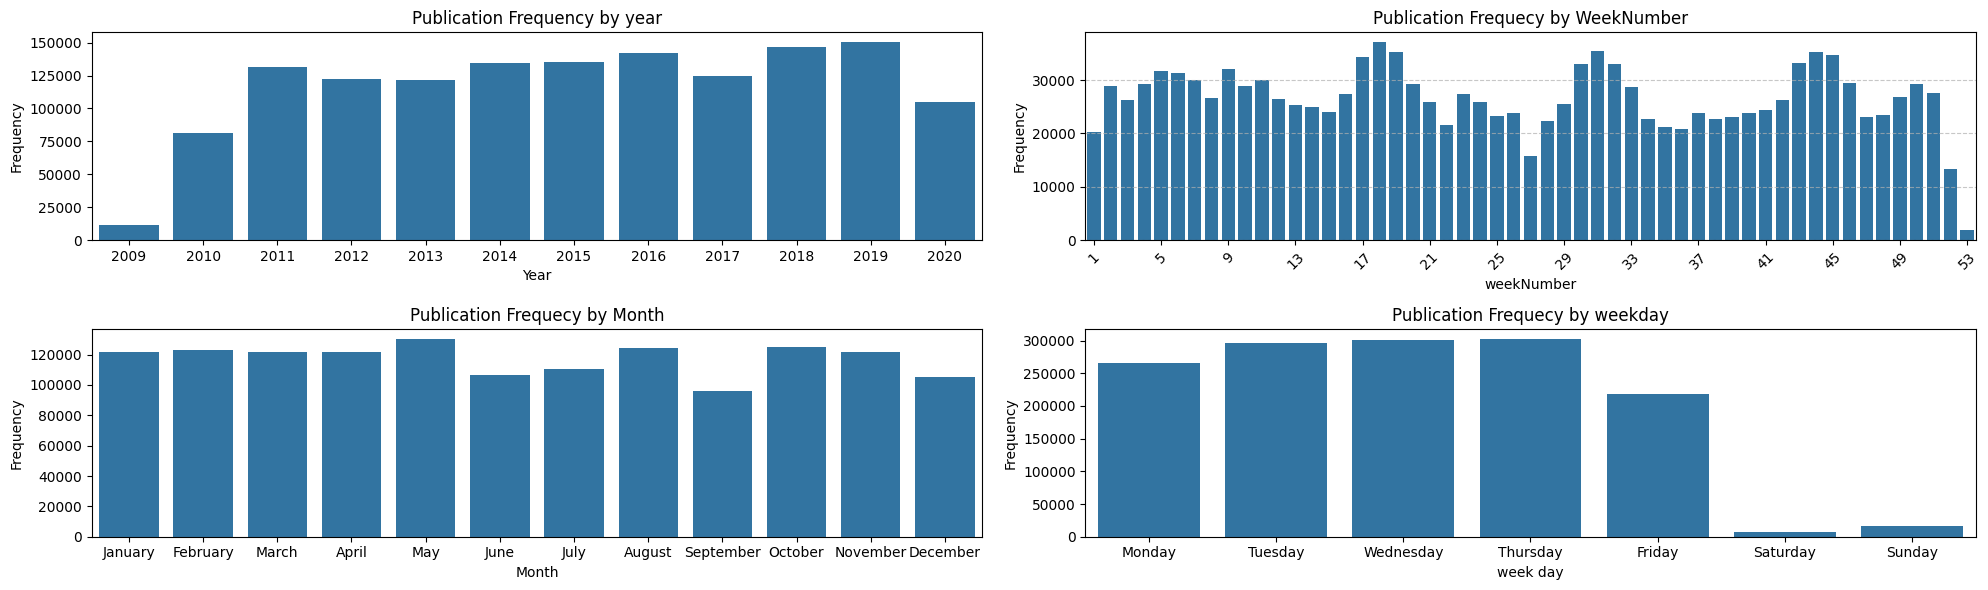

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(20, 6)) # 2 row, 2 columns for subplots

#plot 1: News publication by Year
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, ax=axes[0,0])
axes[0,0].set_title("Publication Frequency by year")
axes[0,0].set_xlabel("Year")
axes[0,0].set_ylabel("Frequency")
#plot 2: News publication by Month"
sns.barplot(x=monthly_counts.index,y=monthly_counts.values, ax=axes[1,0])
axes[1,0].set_title("Publication Frequecy by Month")
axes[1,0].set_xlabel("Month")
axes[1,0].set_ylabel("Frequency")
#plot 3: News Publication by day of the week
sns.barplot(x=weekly_counts.index,y=weekly_counts.values,ax=axes[1,1])
axes[1,1].set_title("Publication Frequecy by weekday")
axes[1,1].set_xlabel("week day")
axes[1,1].set_ylabel("Frequency")
#plot 4: News Publication by day of the weeknumber
sns.barplot(x=week_number.index,y=week_number.values,ax=axes[0,1])
axes[0,1].set_title("Publication Frequecy by WeekNumber")
axes[0,1].set_xlabel("weekNumber")
axes[0,1].set_ylabel("Frequency")


# Adjust x-axis ticks for readability 
if len(week_number.index) > 20:
    axes[0,1].set_xticks(np.arange(0, len(week_number.index), 4)) # Show every 4th tick
    axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

**Topic Modeling**

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
nltk_stopwords= stopwords.words('english')
cv=CountVectorizer(stop_words=nltk_stopwords, max_features=20)
X=cv.fit_transform(News_df['headline'].fillna(''))
terms= cv.get_feature_names_out()
counts =X.toarray().sum(axis=0)
keywords_df=pd.DataFrame({'terms': terms ,'count' : counts})
print(keywords_df.sort_values('count', ascending=False).head())

     terms   count
18      vs  162099
14  stocks  161776
6      est  140604
5      eps  128897
7   market  120558


**Publisher Analysis**

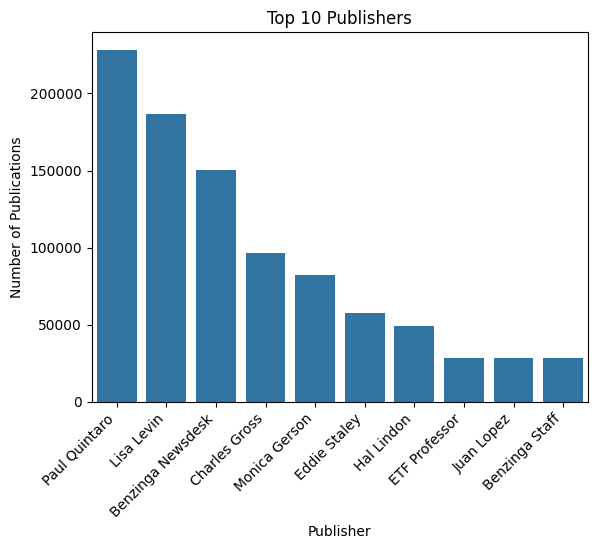

In [16]:
Top_10_publishers=News_df['publisher'].value_counts().head(10)
plt.Figure(figsize=(200,10))
sns.barplot(x=Top_10_publishers.index,y=Top_10_publishers.values)
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Publications')

plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap

plt.show()

In [ ]:
import os

# --- 1. Define the output directory ---
output_dir = 'data\Processed_data'

# Create the directory if it doesn't exist
# `exist_ok=True` means it won't raise an error if the directory already exists
os.makedirs(output_dir, exist_ok=True)
print(f"Ensured directory '{output_dir}' exists.")

# --- 2. Example: Saving news_df ---
# (Assuming news_df is already defined in your notebook)
# For demonstration, creating a dummy news_df if it doesn't exist:
try:
    News_df = News_df # Use the existing news_df
except NameError:
    print("news_df not found, creating dummy for demonstration.")

file_name = 'news_data_processed.csv'
full_path = os.path.join(output_dir, file_name) # This correctly builds the path

News_df.to_csv(full_path, index=True)
print(f"News DataFrame successfully saved to: {full_path}")

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\hp\AppData\Local\Temp\ipykernel_11900\2216755302.py:4: SyntaxWarning: invalid escape sequence '\P'
  output_dir = 'data\Processed_data'


Ensured directory 'data\Processed_data' exists.
News DataFrame successfully saved to: data\Processed_data\news_data_processed.csv
